# Potato acreage & yields over time

resource: https://docs.ropensci.org/rnassqs/

In [1]:
library(rnassqs)
library(pkgmaker)
library(dplyr)
library(ggplot2)
library(data.table)

Loading required package: registry


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




### Set API key

API key: E41D0CC0-8353-3153-A16A-850F2F13AC0E

In [2]:
nassqs_auth(key = 'E41D0CC0-8353-3153-A16A-850F2F13AC0E')

### Define search parameters

In [3]:
nassqs_params()

[1] "agg_level_desc"        "asd_code"              "asd_desc"             
 [4] "begin_code"            "class_desc"            "commodity_desc"       
 [7] "congr_district_code"   "country_code"          "country_name"         
[10] "county_ansi"           "county_code"           "county_name"          
[13] "CV"                    "domaincat_desc"        "domain_desc"          
[16] "end_code"              "freq_desc"             "group_desc"           
[19] "load_time"             "location_desc"         "prodn_practice_desc"  
[22] "reference_period_desc" "region_desc"           "sector_desc"          
[25] "short_desc"            "state_alpha"           "state_ansi"           
[28] "state_name"            "state_fips_code"       "statisticcat_desc"    
[31] "source_desc"           "unit_desc"             "util_practice_desc"   
[34] "Value"                 "watershed_code"        "watershed_desc"       
[37] "week_ending"           "year"                  "zip_5"                
[40] "format"

In [4]:
# Parameters to query on and data call
params <- list(commodity_desc = "potatoes", # gather potato data
               year = 1950, # we want year 1950
               state_alpha = "WA") # for the state of washington

In [5]:
#nassqs(params)

### Yields

In [10]:
# nassqs_yields(params)

### Acerage

In [6]:
#nassqs_acres(params)

## Collect data from multiple years

In [7]:
# Define the list of parameters to use repeatedly
param_list <- list(
  commodity_desc = "potatoes",
  state_alpha = "WA")

### Acerage

In [113]:
# Iterate through each year to get data  
data_list <- lapply(1885:2019, function(yr) {
  params <- param_list
  params[['year']] <- yr
#   nassqs(params)
#  nassqs_yields(params)
  nassqs_acres(params)
})

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |=====================================

In [114]:
# Using dplyr to bind the data list
dta <- rbindlist(data_list, use.names=TRUE)

#### Inspect data structure and features

In [115]:
# Check that our record request is under the 50,000 limit
# nassqs_record_count(params)
dim(dta)

[1] 2909   39

In [116]:
table(dta$year)


1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 
   1    1    1    1    1    1    1    1    1    1    1    1    2    2    2    2 
1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 
   2    2    2    2    2    2    2    2    2    2    2    2    2    2    2    2 
1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 
   4    4    4    4    4    4    4    4    4    4    4    4    4    4    4    4 
1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 
  28   28   28   25   25   25   25   27   27   27   27   27   27   26   50   50 
1981 1982 1983 1984 1985 19

In [117]:
str(dta)

Classes ‘data.table’ and 'data.frame':	2909 obs. of  39 variables:
 $ state_name           : chr  "WASHINGTON" "WASHINGTON" "WASHINGTON" "WASHINGTON" ...
 $ county_ansi          : chr  "" "" "" "" ...
 $ sector_desc          : chr  "CROPS" "CROPS" "CROPS" "CROPS" ...
 $ end_code             : chr  "00" "00" "00" "00" ...
 $ short_desc           : chr  "POTATOES - ACRES HARVESTED" "POTATOES - ACRES HARVESTED" "POTATOES - ACRES HARVESTED" "POTATOES - ACRES HARVESTED" ...
 $ week_ending          : chr  "" "" "" "" ...
 $ agg_level_desc       : chr  "STATE" "STATE" "STATE" "STATE" ...
 $ region_desc          : chr  "" "" "" "" ...
 $ country_name         : chr  "UNITED STATES" "UNITED STATES" "UNITED STATES" "UNITED STATES" ...
 $ group_desc           : chr  "VEGETABLES" "VEGETABLES" "VEGETABLES" "VEGETABLES" ...
 $ freq_desc            : chr  "ANNUAL" "ANNUAL" "ANNUAL" "ANNUAL" ...
 $ source_desc          : chr  "SURVEY" "SURVEY" "SURVEY" "SURVEY" ...
 $ Value                : chr  "10,00

#### Summary statistics

In [118]:
class(dta$Value)

[1] "character"

In [119]:
dta$Value

[1] "10,000"               "11,000"               "11,000"              
   [4] "12,000"               "13,000"               "14,000"              
   [7] "16,000"               "17,000"               "18,000"              
  [10] "20,000"               "22,000"               "20,000"              
  [13] "22,000"               "22,000"               "25,000"              
  [16] "27,000"               "29,000"               "34,000"              
  [19] "33,000"               "35,000"               "42,000"              
  [22] "44,000"               "47,000"               "51,000"              
  [25] "58,000"               "55,000"               "57,000"              
  [28] "67,000"               "58,000"               "56,000"              
  [31] "58,000"               "57,000"               "75,000"              
  [34] "62,000"               "55,000"               "53,000"              
  [37] "57,000"               "64,000"               "51,000"              
  [40] "48,000"               "51,000"               "53,000"              
  [43] "61,000"               "54,000"               "46,000"              
  [46] "46,000"               "53,000"               "53,000"              
  [49] "51,000"               "51,000"               "51,000"              
  [52] "51,000"               "52,000"               "52,000"              
  [55] "57,000"               "57,000"               "48,000"              
  [58] "57,000"               "43,000"               "43,000"              
  [61] "44,000"               "44,000"               "42,000"              
  [64] "42,000"               "37,000"               "37,000"              
  [67] "37,000"               "37,000"               "35,000"              
  [70] "35,000"               "33,000"               "34,000"              
  [73] "46,000"               "47,000"               "32,000"              
  [76] "33,000"               "34,000"               "35,000"              
  [79] "39,000"               "39,000"               "30,000"              
  [82] "30,000"               "34,000"               "34,000"              
  [85] "29,000"               "29,000"               "29,000"              
  [88] "29,000"               "31,000"               "31,000"              
  [91] "31,000"               "31,000"               "28,000"              
  [94] "28,000"               "28,000"               "28,000"              
  [97] "26,000"               "26,000"               "26,000"              
 [100] "26,000"               "27,000"               "27,000"              
 [103] "27,000"               "27,000"               "30,000"              
 [106] "30,000"               "30,000"               "30,000"              
 [109] "36,000"               "38,000"               "36,000"              
 [112] "38,000"               "39,000"               "39,000"              
 [115] "39,000"               "39,000"               "36,000"              
 [118] "36,000"               "36,000"               "36,000"              
 [121] "42,000"               "42,000"               "42,000"              
 [124] "42,000"               "35,000"               "35,000"              
 [127] "35,000"               "35,000"               "35,000"              
 [130] "35,000"               "35,000"               "35,000"              
 [133] "43,000"               "43,000"               "43,000"              
 [136] "43,000"               "39,000"               "39,000"              
 [139] "39,000"               "39,000"               "35,000"              
 [142] "35,000"               "35,000"               "35,000"              
 [145] "39,000"               "39,000"               "39,000"              
 [148] "39,000"               "4,710"                "4,530"               
 [151] "250"                  "41,760"               "50"                  
 [154] "200"                  "780"                  "70"                  
 [157] "100"                  "130"                

**coerce value into a number**

In [120]:
dta$value = as.numeric(gsub(",", "", dta$Value))

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [121]:
dta$value

[1]  10000  11000  11000  12000  13000  14000  16000  17000  18000  20000
  [11]  22000  20000  22000  22000  25000  27000  29000  34000  33000  35000
  [21]  42000  44000  47000  51000  58000  55000  57000  67000  58000  56000
  [31]  58000  57000  75000  62000  55000  53000  57000  64000  51000  48000
  [41]  51000  53000  61000  54000  46000  46000  53000  53000  51000  51000
  [51]  51000  51000  52000  52000  57000  57000  48000  57000  43000  43000
  [61]  44000  44000  42000  42000  37000  37000  37000  37000  35000  35000
  [71]  33000  34000  46000  47000  32000  33000  34000  35000  39000  39000
  [81]  30000  30000  34000  34000  29000  29000  29000  29000  31000  31000
  [91]  31000  31000  28000  28000  28000  28000  26000  26000  26000  26000
 [101]  27000  27000  27000  27000  30000  30000  30000  30000  36000  38000
 [111]  36000  38000  39000  39000  39000  39000  36000  36000  36000  36000
 [121]  42000  42000  42000  42000  35000  35000  35000  35000  35000  35000
 [131]  35000  35000  43000  43000  43000  43000  39000  39000  39000  39000
 [141]  35000  35000  35000  35000  39000  39000  39000  39000   4710   4530
 [151]    250  41760     50    200    780     70    100    130     80    880
 [161]    170   2500    950    780    200   2600    250   8500     60  10800
 [171]  22400     50  51500  51500  51500  51500   4400   4450    250  47450
 [181]   1200    250    630    100    130    100     90    830    220   2300
 [191]    820    800    180   2650    250   9900     50  13100  24400   1200
 [201]  58000  58000  58000  58000   4600   5480    240  52200   1250    230
 [211]    780     60    150     80     90    830    260   2350   1630    650
 [221]    200   3000    240  10500     50  13450  28200   1250  64000  64000
 [231]  64000  64000   4150   6970    150  51800    550    380    800    150
 [241]     80    540    280   2300   2100    870    200   3800    150  10000
 [251]  15000  26800    550  64000  64000  64000  64000   4100   7950    120
 [261]  56600   2500    430    800    150    100    650    350   2050   3200
 [271]   1000    150   3600    120  10000  16000  30600   2500  71700  72000
 [281]  71700  72000   4400   7050    120  70100   4800    530    800    120
 [291]     60    870    450   2100   2400    700    150   3800    120  12800
 [301]  19500  37800   4800  87000  87000  87000  87000   4770   9500    100
 [311]  60400   2800    430    800    150     70    800    650   2300   5000
 [321]    400    100   4000    100  12500  18600  29300   2800  78000  78000
 [331]  78000  78000   5400  10900    300  53900   4300    200    750    100
 [341]    100    850    700   2900   7100    400    200   3200    100    200
 [351]  11200  16500  26200   4200    100  75000  75000  75000  75000   4400
 [361]  16000    400  57400   3500    300    650    150    150    150    900
 [371]    600   1800  12000    600    400   3000    200    200  13000  15900
 [381]  28500   3500  82000  84000  82000  84000   6130  22800    850  63900
 [391]   3800    520    650    600    130    250   1200    800   2500  18500
 [401]    900    400   3000    250    600  14400  17500  32000   3800  98000
 [411] 100000  98000 100000   5720  23000    780  69000   6000    500    600
 [421]    550    120    200   1200    750   2300  18700    900    300   3100
 [431]    200    580  15500  19000  34500   6000 105000 107000 105000 107000
 [441]   6150  26320    700  82200   8000    630    600    550    100    200
 [451]   1400    900   2400  22000    900    220   3200    300    400  21000
 [461]  23200  38000   8000 124000 124000 124000 124000   6200  24980    600
 [471]  70700   7200    320    540    580     90   1900   1600    700   2500
 [481]  21500    650    230   2600    200    400  18000  22300  30400   7200
 [491] 110000 110000 110000 110000   4790  26550    470  71100   5900    190
 [501]    600    300     60   1450    180   2200  24000    600    350   1600
 [511]    150    320  15500  24700  30900   5900 111000 111000 111000 111000

In [122]:
summary(as.numeric(dta$value))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1     600    6917   27972   33925  175000     241 

In [123]:
lapply(dta, unique)

$state_name
[1] "WASHINGTON"

$county_ansi
 [1] ""    "011" "015" "027" "033" "053" "057" "061" "073" "005" "037" "047"
[13] "077" "063" "001" "017" "021" "025" "071" "039" "065" "075" "029" "035"
[25] "041" "067" "043" "055" "009" "031" "045" "049" "069" "007" "019" "051"
[37] "003" "013" "059"

$sector_desc
[1] "CROPS"        "DEMOGRAPHICS"

$end_code
[1] "00"

$short_desc
 [1] "POTATOES - ACRES HARVESTED"                                            
 [2] "POTATOES - ACRES PLANTED"                                              
 [3] "POTATOES, FALL - ACRES HARVESTED"                                      
 [4] "POTATOES, FALL - ACRES PLANTED"                                        
 [5] "POTATOES, IRRIGATED - ACRES HARVESTED"                                 
 [6] "POTATOES, IRRIGATED, ENTIRE CROP - ACRES HARVESTED"                    
 [7] "POTATOES, IRRIGATED, NONE OF CROP - ACRES HARVESTED"                   
 [8] "POTATOES, IRRIGATED, PART OF CROP, IRRIGATED PORTION - ACRES HARVESTED"
 [9] "POTATOES, FRESH MARKET - ACRES HARVESTED"                              
[10] "POTATOES, PROCESSING - ACRES HARVESTED"                                
[11] "POTATOES, ORGANIC - ACRES HARVESTED"                                   
[12] "POTATOES, NON-IRRIGATED - ACRES HARVESTED"                             
[13] "POTATOES, SEED, CERTIFIED - ACRES PLANTED"                             
[14] "POTATOES, SEED, ENTERED FOR CERTIFICATION - ACRES PLANTED"             

$week_ending
[1] ""

$agg_level_desc
[1] "STATE"                 "AGRICULTURAL DISTRICT" "COUNTY"               

$region_desc
[1] ""

$country_name
[1] "UNITED STATES"

$group_desc
[1] "VEGETABLES"

$freq_desc
[1] "ANNUAL"

$source_desc
[1] "SURVEY" "CENSUS"

$Value
  [1] "10,000"               "11,000"               "12,000"              
  [4] "13,000"               "14,000"               "16,000"              
  [7] "17,000"               "18,000"               "20,000"              
 [10] "22,000"               "25,000"               "27,000"              
 [13] "29,000"               "34,000"               "33,000"              
 [16] "35,000"               "42,000"               "44,000"              
 [19] "47,000"               "51,000"               "58,000"              
 [22] "55,000"               "57,000"               "67,000"              
 [25] "56,000"               "75,000"               "62,000"              
 [28] "53,000"               "64,000"               "48,000"              
 [31] "61,000"               "54,000"               "46,000"              
 [34] "52,000"               "43,000"               "37,000"              
 [37] "32,000"               "39,000"               "30,000"              
 [40] "31,000"               "28,000"               "26,000"              
 [43] "36,000"               "38,000"               "4,710"               
 [46] "4,530"                "250"                  "41,760"              
 [49] "50"                   "200"                  "780"                 
 [52] "70"                   "100"                  "130"                 
 [55] "80"                   "880"                  "170"                 
 [58] "2,500"                "950"                  "2,600"               
 [61] "8,500"                "60"                   "10,800"              
 [64] "22,400"               "51,500"               "4,400"               
 [67] "4,450"                "47,450"               "1,200"               
 [70] "630"                  "90"                   "830"                 
 [73] "220"                  "2,300"                "820"                 
 [76] "800"                  "180"                  "2,650"               
 [79] "9,900"                "13,100"               "24,400"              
 [82] "4,600"                "5,480"                "240"                 
 [85] "52,200"               "1,250"                "230"                 
 [88] "150"                  "260"                  "2,350"               
 [91] "1,63

#### Plot

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 241 rows containing non-finite values (stat_smooth).”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 2012”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 1”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 1”
Warning message:
“Removed 241 rows containing missing values (geom_point).”


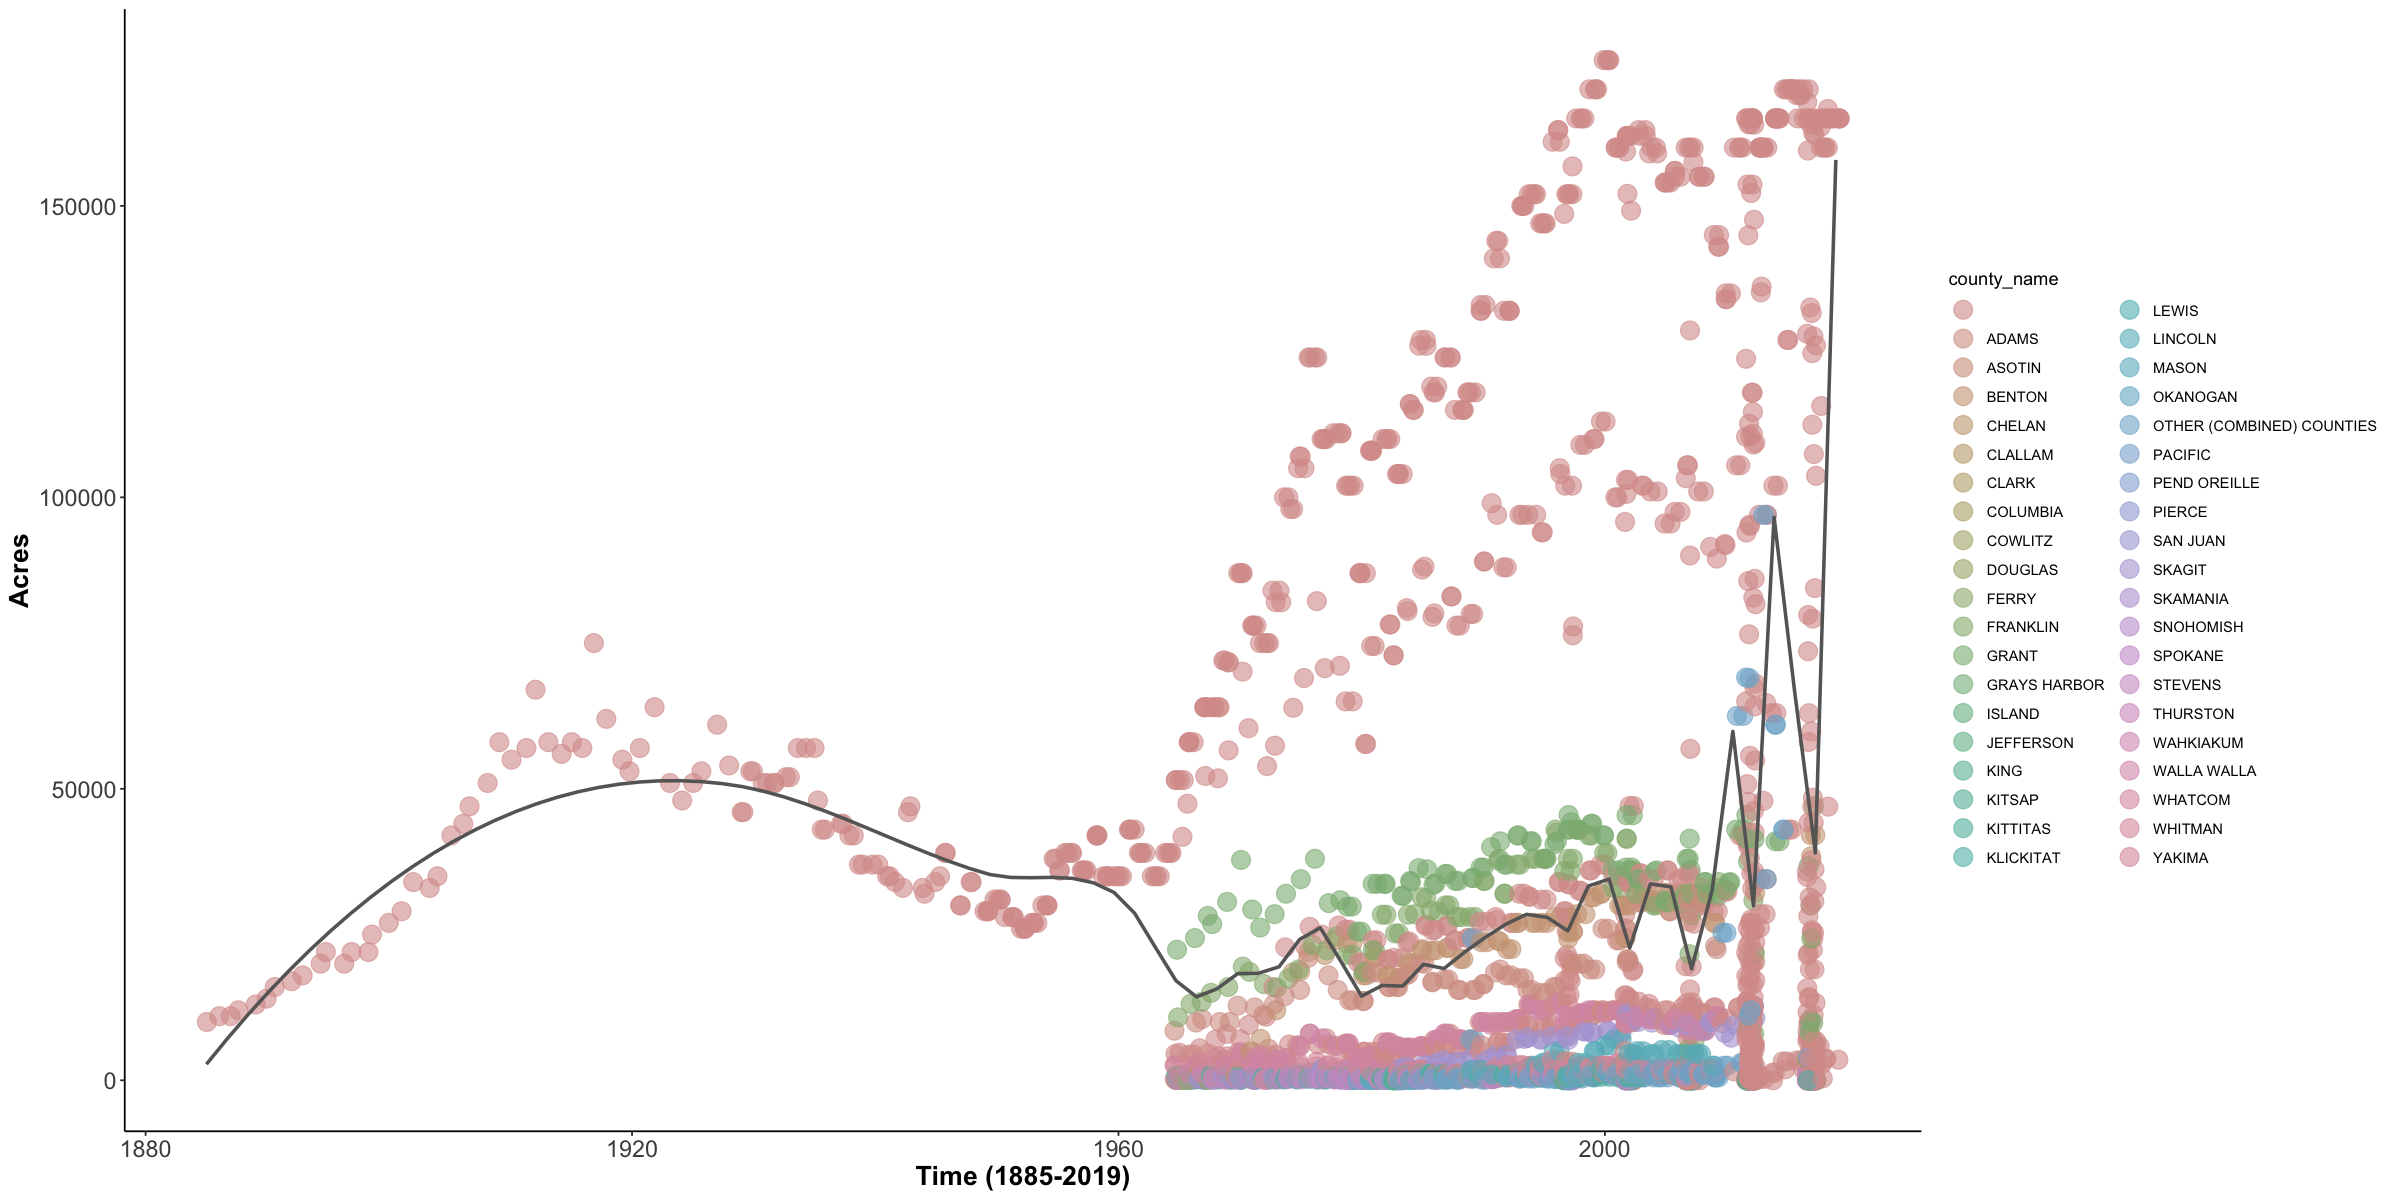

In [124]:
# Plot size
options(repr.plot.width = 20, repr.plot.height = 10)
# Plot
dta %>%
group_by(year) %>%
select(year, value, county_name) %>%
ggplot(aes(x=year, y=value)) +
geom_jitter(aes(colour = county_name), size=5, alpha=3/5) +
theme_classic() + 
theme(axis.title.x=element_text(size=16, face="bold"),
      axis.text.x=element_text(size=14),
      axis.title.y=element_text(size=16,face="bold"),
      axis.text.y=element_text(size=14)) +
scale_color_hue(l=70, c=40) +
labs(x="Time (1885-2019)",
    y="Acres")  +
geom_smooth(method = "loess", span = 0.1, se = FALSE, color="grey40")

### Yields

In [75]:
# Iterate through each year to get data  
data_list <- lapply(1885:2019, function(yr) {
  params <- param_list
  params[['year']] <- yr
  nassqs(params)
  nassqs_yields(params)
  #nassqs_acres(params)
})

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |=====================================

In [102]:
# Using dplyr to bind the data list
dty <- rbindlist(data_list, use.names=TRUE)

In [103]:
# Check that our record request is under the 50,000 limit
# nassqs_record_count(params)
dim(dty)

[1] 1212   39

In [104]:
table(dty$year)


1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 
   2    2    2    2    2    2    2    2    2    2    2    2    2    2    2    2 
1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 
  26   26   26   23   23   23   23   25   25   25   25   25   25   24   25   25 
1981 1982 1983 1984 1985 19

In [105]:
str(dty)

Classes ‘data.table’ and 'data.frame':	1212 obs. of  39 variables:
 $ end_code             : chr  "00" "00" "00" "00" ...
 $ short_desc           : chr  "POTATOES - YIELD, MEASURED IN CWT / ACRE" "POTATOES - YIELD, MEASURED IN CWT / ACRE" "POTATOES - YIELD, MEASURED IN CWT / ACRE" "POTATOES - YIELD, MEASURED IN CWT / ACRE" ...
 $ state_name           : chr  "WASHINGTON" "WASHINGTON" "WASHINGTON" "WASHINGTON" ...
 $ sector_desc          : chr  "CROPS" "CROPS" "CROPS" "CROPS" ...
 $ county_ansi          : chr  "" "" "" "" ...
 $ unit_desc            : chr  "CWT / ACRE" "CWT / ACRE" "CWT / ACRE" "CWT / ACRE" ...
 $ freq_desc            : chr  "ANNUAL" "ANNUAL" "ANNUAL" "ANNUAL" ...
 $ source_desc          : chr  "SURVEY" "SURVEY" "SURVEY" "SURVEY" ...
 $ Value                : chr  "75" "77" "73" "75" ...
 $ agg_level_desc       : chr  "STATE" "STATE" "STATE" "STATE" ...
 $ region_desc          : chr  "" "" "" "" ...
 $ week_ending          : chr  "" "" "" "" ...
 $ group_desc           :

#### Summary statistics

In [106]:
class(dty$Value)

[1] "character"

In [107]:
dty$Value

[1] "75"    "77"    "73"    "75"    "66"    "78"    "83"    "67"    "75"   
  [10] "74"    "82"    "76"    "94"    "74"    "85"    "71"    "71"    "82"   
  [19] "85"    "68"    "80"    "76"    "87"    "68"    "79"    "68"    "79"   
  [28] "83"    "76"    "71"    "76"    "84"    "66"    "68"    "66"    "99"   
  [37] "96"    "99"    "96"    "90"    "93"    "108"   "114"   "90"    "99"   
  [46] "96"    "93"    "96"    "108"   "98"    "102"   "109"   "120"   "108"  
  [55] "115"   "129"   "135"   "123"   "138"   "141"   "159"   "168"   "219"  
  [64] "228"   "222"   "222"   "230"   "230"   "232"   "232"   "241"   "241"  
  [73] "240"   "240"   "264"   "264"   "268"   "268"   "262"   "262"   "277"  
  [82] "277"   "260"   "260"   "276"   "276"   "288"   "288"   "300"   "300"  
  [91] "301"   "301"   "335"   "335"   "300"   "300"   "237"   "242"   "180"  
 [100] "378"   "260"   "190"   "205"   "214"   "200"   "231"   "250"   "250"  
 [109] "235"   "244"   "251"   "281"   "210"   "230"   "180"   "394"   "217"  
 [118] "368"   "377"   "260"   "351"   "351"   "273"   "290"   "200"   "396"  
 [127] "360"   "192"   "260"   "260"   "254"   "240"   "300"   "330"   "341"  
 [136] "252"   "320"   "310"   "250"   "277"   "200"   "395"   "260"   "390"  
 [145] "401"   "360"   "376"   "376"   "231"   "260"   "225"   "365"   "365"  
 [154] "170"   "235"   "250"   "240"   "200"   "289"   "260"   "288"   "210"  
 [163] "290"   "275"   "200"   "245"   "225"   "368"   "260"   "361"   "366"  
 [172] "365"   "345"   "345"   "263"   "330"   "220"   "395"   "336"   "232"  
 [181] "250"   "253"   "300"   "350"   "361"   "235"   "346"   "334"   "250"  
 [190] "325"   "220"   "415"   "386"   "393"   "336"   "378"   "378"   "301"  
 [199] "356"   "275"   "430"   "490"   "302"   "280"   "380"   "270"   "340"  
 [208] "380"   "280"   "385"   "324"   "200"   "345"   "275"   "450"   "437"  
 [217] "420"   "490"   "416"   "416"   "301"   "341"   "275"   "395"   "424"  
 [226] "262"   "270"   "325"   "250"   "360"   "340"   "280"   "355"   "320"  
 [235] "240"   "340"   "275"   "405"   "400"   "388"   "424"   "386"   "386"  
 [244] "281"   "340"   "240"   "402"   "395"   "263"   "250"   "260"   "300"  
 [253] "315"   "320"   "270"   "360"   "320"   "220"   "320"   "240"   "400"  
 [262] "410"   "398"   "395"   "386"   "386"   "302"   "394"   "367"   "436"  
 [271] "415"   "250"   "300"   "260"   "280"   "340"   "320"   "290"   "440"  
 [280] "400"   "250"   "300"   "300"   "400"   "450"   "420"   "440"   "420"  
 [289] "200"   "418"   "418"   "315"   "371"   "340"   "455"   "460"   "260"  
 [298] "320"   "260"   "300"   "320"   "350"   "320"   "300"   "405"   "300"  
 [307] "200"   "270"   "380"   "300"   "460"   "430"   "467"   "460"   "430"  
 [316] "430"   "278"   "387"   "294"   "449"   "410"   "256"   "280"   "250"  
 [325] "277"   "280"   "320"   "320"   "250"   "410"   "280"   "240"   "300"  
 [334] "304"   "290"   "445"   "450"   "450"   "410"   "420"   "420"   "318"  
 [343] "458"   "264"   "479"   "422"   "280"   "300"   "280"   "250"   "260"  
 [352] "375"   "300"   "317"   "489"   "400"   "260"   "310"   "330"   "241"  
 [361] "500"   "490"   "464"   "422"   "460"   "460"   "301"   "372"   "270"  
 [370] "484"   "500"   "276"   "300"   "290"   "240"   "250"   "357"   "320"  
 [379] "270"   "380"   "400"   "250"   "300"   "310"   "240"   "476"   "480"  
 [388] "491"   "500"   "450"   "450"   "313"   "478"   "268"   "475"   "479"  
 [397] "281"   "260"   "280"   "250"   "260"   "350"   "370"   "300"   "474"  
 [406] "500"   "260"   "320"   "325"   "240"   "474"   "477"   "473"   "479"  
 [415] "460"   "460"   "289"   "468"   "302"   "476"   "475"   "284"   "200"  
 [424] "300"   "260"   "330"   "360"   "280"   "480"   "400"   "270"   "365"  
 [433] "310"   "300"   "475"   "485"   "470"   "475"   "455"   "455"   "283"  
 [442] "475"   "285"   "489"   "475"   "270"   "250"   "235"   "295"   "300"  
 [451] "280"   "255"   "485"   "385"   "430"   "235" 

**coerce value into a number**

In [108]:
dty$value = as.numeric(as.character(dty$Value))

In [109]:
dty$value

[1]  75.0  77.0  73.0  75.0  66.0  78.0  83.0  67.0  75.0  74.0  82.0  76.0
  [13]  94.0  74.0  85.0  71.0  71.0  82.0  85.0  68.0  80.0  76.0  87.0  68.0
  [25]  79.0  68.0  79.0  83.0  76.0  71.0  76.0  84.0  66.0  68.0  66.0  99.0
  [37]  96.0  99.0  96.0  90.0  93.0 108.0 114.0  90.0  99.0  96.0  93.0  96.0
  [49] 108.0  98.0 102.0 109.0 120.0 108.0 115.0 129.0 135.0 123.0 138.0 141.0
  [61] 159.0 168.0 219.0 228.0 222.0 222.0 230.0 230.0 232.0 232.0 241.0 241.0
  [73] 240.0 240.0 264.0 264.0 268.0 268.0 262.0 262.0 277.0 277.0 260.0 260.0
  [85] 276.0 276.0 288.0 288.0 300.0 300.0 301.0 301.0 335.0 335.0 300.0 300.0
  [97] 237.0 242.0 180.0 378.0 260.0 190.0 205.0 214.0 200.0 231.0 250.0 250.0
 [109] 235.0 244.0 251.0 281.0 210.0 230.0 180.0 394.0 217.0 368.0 377.0 260.0
 [121] 351.0 351.0 273.0 290.0 200.0 396.0 360.0 192.0 260.0 260.0 254.0 240.0
 [133] 300.0 330.0 341.0 252.0 320.0 310.0 250.0 277.0 200.0 395.0 260.0 390.0
 [145] 401.0 360.0 376.0 376.0 231.0 260.0 225.0 365.0 365.0 170.0 235.0 250.0
 [157] 240.0 200.0 289.0 260.0 288.0 210.0 290.0 275.0 200.0 245.0 225.0 368.0
 [169] 260.0 361.0 366.0 365.0 345.0 345.0 263.0 330.0 220.0 395.0 336.0 232.0
 [181] 250.0 253.0 300.0 350.0 361.0 235.0 346.0 334.0 250.0 325.0 220.0 415.0
 [193] 386.0 393.0 336.0 378.0 378.0 301.0 356.0 275.0 430.0 490.0 302.0 280.0
 [205] 380.0 270.0 340.0 380.0 280.0 385.0 324.0 200.0 345.0 275.0 450.0 437.0
 [217] 420.0 490.0 416.0 416.0 301.0 341.0 275.0 395.0 424.0 262.0 270.0 325.0
 [229] 250.0 360.0 340.0 280.0 355.0 320.0 240.0 340.0 275.0 405.0 400.0 388.0
 [241] 424.0 386.0 386.0 281.0 340.0 240.0 402.0 395.0 263.0 250.0 260.0 300.0
 [253] 315.0 320.0 270.0 360.0 320.0 220.0 320.0 240.0 400.0 410.0 398.0 395.0
 [265] 386.0 386.0 302.0 394.0 367.0 436.0 415.0 250.0 300.0 260.0 280.0 340.0
 [277] 320.0 290.0 440.0 400.0 250.0 300.0 300.0 400.0 450.0 420.0 440.0 420.0
 [289] 200.0 418.0 418.0 315.0 371.0 340.0 455.0 460.0 260.0 320.0 260.0 300.0
 [301] 320.0 350.0 320.0 300.0 405.0 300.0 200.0 270.0 380.0 300.0 460.0 430.0
 [313] 467.0 460.0 430.0 430.0 278.0 387.0 294.0 449.0 410.0 256.0 280.0 250.0
 [325] 277.0 280.0 320.0 320.0 250.0 410.0 280.0 240.0 300.0 304.0 290.0 445.0
 [337] 450.0 450.0 410.0 420.0 420.0 318.0 458.0 264.0 479.0 422.0 280.0 300.0
 [349] 280.0 250.0 260.0 375.0 300.0 317.0 489.0 400.0 260.0 310.0 330.0 241.0
 [361] 500.0 490.0 464.0 422.0 460.0 460.0 301.0 372.0 270.0 484.0 500.0 276.0
 [373] 300.0 290.0 240.0 250.0 357.0 320.0 270.0 380.0 400.0 250.0 300.0 310.0
 [385] 240.0 476.0 480.0 491.0 500.0 450.0 450.0 313.0 478.0 268.0 475.0 479.0
 [397] 281.0 260.0 280.0 250.0 260.0 350.0 370.0 300.0 474.0 500.0 260.0 320.0
 [409] 325.0 240.0 474.0 477.0 473.0 479.0 460.0 460.0 289.0 468.0 302.0 476.0
 [421] 475.0 284.0 200.0 300.0 260.0 330.0 360.0 280.0 480.0 400.0 270.0 365.0
 [433] 310.0 300.0 475.0 485.0 470.0 475.0 455.0 455.0 283.0 475.0 285.0 489.0
 [445] 475.0 270.0 250.0 235.0 295.0 300.0 280.0 255.0 485.0 385.0 430.0 235.0
 [457] 350.0 305.0 260.0 480.0 495.0 490.0 475.0 475.0 475.0 293.0 496.0 323.0
 [469] 526.0 530.0 280.0 250.0 260.0 340.0 300.0 270.0 250.0 510.0 390.0 360.0
 [481] 300.0 386.0 335.0 300.0 535.0 540.0 510.0 530.0 505.0 505.0 274.0 500.0
 [493] 305.0 501.0 505.0 300.0 300.0 220.0 300.0 270.0 280.0 270.0 230.0 520.0
 [505] 370.0 320.0 260.0 360.0 330.0 280.0 490.0 520.0 495.0 505.0 490.0 490.0
 [517] 313.0 476.0 407.0 490.0 490.0 290.0 240.0 250.0 310.0 320.0 397.0 490.0
 [529] 370.0 280.0 410.0 260.0 420.0 380.0 485.0 480.0 500.0 400.0 490.0 480.0
 [541] 480.0 330.0 500.0 290.0 539.0 500.0 310.0 310.0 250.0 300.0 250.0 250.0
 [553] 300.0 360.0 270.0 250.0 300.0 530.0 380.0 345.0 360.0 320.0 300.0 270.0
 [565] 525.0 545.0 540.0 440.0 500.0 520.0 520.0 343.0 472.0 300.0 513.0 485.0
 [577] 290.0 260.0 260.0 395.0 300.0 300.0 495.0 395.0 240.0 350.0 380.0 300.0
 [589] 300.0 515.0 515.0 510.0 350.0 485.0 495.0 495.0 303.0 490.0 308.0 524.0
 [601] 500.0 320.0 200.0 200.0 320.0 260.0 430.0 520.

In [110]:
summary(as.numeric(dty$value))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   22.0   300.0   390.0   409.8   550.0   727.0 

**Inspect all unique values**

In [111]:
lapply(dty, unique)

$end_code
[1] "00"

$short_desc
[1] "POTATOES - YIELD, MEASURED IN CWT / ACRE"                         
[2] "POTATOES, FALL - YIELD, MEASURED IN CWT / ACRE"                   
[3] "POTATOES, IRRIGATED, ENTIRE CROP - YIELD, MEASURED IN CWT / ACRE" 
[4] "POTATOES, IRRIGATED, NONE OF CROP - YIELD, MEASURED IN CWT / ACRE"
[5] "POTATOES, IRRIGATED, PART OF CROP - YIELD, MEASURED IN CWT / ACRE"
[6] "POTATOES, IRRIGATED - YIELD, MEASURED IN CWT / ACRE"              
[7] "POTATOES, NON-IRRIGATED - YIELD, MEASURED IN CWT / ACRE"          

$state_name
[1] "WASHINGTON"

$sector_desc
[1] "CROPS"

$county_ansi
 [1] ""    "011" "015" "027" "033" "053" "057" "061" "073" "005" "037" "047"
[13] "077" "063" "001" "017" "021" "025" "071" "039" "065" "075" "029" "035"
[25] "041" "067" "043"

$unit_desc
[1] "CWT / ACRE"

$freq_desc
[1] "ANNUAL"

$source_desc
[1] "SURVEY" "CENSUS"

$Value
  [1] "75"    "77"    "73"    "66"    "78"    "83"    "67"    "74"    "82"   
 [10] "76"    "94"    "85"    "71"    "68"    "80"    "87"    "79"    "84"   
 [19] "99"    "96"    "90"    "93"    "108"   "114"   "98"    "102"   "109"  
 [28] "120"   "115"   "129"   "135"   "123"   "138"   "141"   "159"   "168"  
 [37] "219"   "228"   "222"   "230"   "232"   "241"   "240"   "264"   "268"  
 [46] "262"   "277"   "260"   "276"   "288"   "300"   "301"   "335"   "237"  
 [55] "242"   "180"   "378"   "190"   "205"   "214"   "200"   "231"   "250"  
 [64] "235"   "244"   "251"   "281"   "210"   "394"   "217"   "368"   "377"  
 [73] "351"   "273"   "290"   "396"   "360"   "192"   "254"   "330"   "341"  
 [82] "252"   "320"   "310"   "395"   "390"   "401"   "376"   "225"   "365"  
 [91] "170"   "289"   "275"   "245"   "361"   "366"   "345"   "263"   "220"  
[100] "336"   "253"   "350"   "346"   "334"   "325"   "415"   "386"   "393"  
[109] "356"   "430"   "490"   "302"   "280"   "380"   "270"   "340"   "385"  
[118] "324"   "450"   "437"   "420"   "416"   "424"   "355"   "405"   "400"  
[127] "388"   "402"   "315"   "410"   "398"   "367"   "436"   "440"   "418"  
[136] "371"   "455"   "460"   "467"   "278"   "387"   "294"   "449"   "256"  
[145] "304"   "445"   "318"   "458"   "479"   "422"   "375"   "317"   "489"  
[154] "500"   "464"   "372"   "484"   "357"   "476"   "480"   "491"   "313"  
[163] "478"   "475"   "370"   "474"   "477"   "473"   "468"   "284"   "485"  
[172] "470"   "283"   "285"   "295"   "255"   "305"   "495"   "293"   "496"  
[181] "323"   "526"   "530"   "510"   "535"   "540"   "505"   "274"   "501"  
[190] "520"   "407"   "397"   "539"   "525"   "545"   "343"   "472"   "513"  
[199] "515"   "303"   "308"   "524"   "326"   "312"   "523"   "550"   "338"  
[208] "555"   "311"   "565"   "333"   "560"   "553"   "575"   "570"   "610"  
[217] "580"   "507"   "348"   "529"   "425"   "595"   "635"   "600"   "655"  
[226] "605"   "590"   "645"   "675"   "615"   "585"   "630"   "670"   "620"  
[235] "640"   "650"   "685"   "567.8" "432.9" "410.3" "625"   "680"   "725"  
[244] "337"   "662"   "604"   "583"   "589"   "558"   "354"   "681"   "626"  
[253] "700"   "602"   "643"   "632"   "659"   "576"   "578"   "383"   "690"  
[262] "624"   "661"   "362"   "716"   "417"   "641"   "616"   "607"   "453"  
[271] "628"   "364"   "572"   "287"   "621"   "665"   "606"   "627"   "638"  
[280] "727"   "668"   "699"   "382"   "712"   "609"   "660"   "601"   "710"  
[289] "352"   "587"   "636"   "612"   "573"   "428"   "512"   "22"    "691"  
[298] "488"   "646"   "674"   "561"   "647"   "642"  

$agg_level_desc
[1] "STATE"                 "AGRICULTURAL DISTRICT" "COUNTY"               

$region_desc
[1] ""

$week_ending
[1] ""

$group_desc
[1] "VEGETABLES"

$country_name
[1] "UNITED STATES"

$asd_code
[1] ""   "10" "20" "30" "50" "90" "98"

$county_code
 [1] ""    "999" "011" "015" "027" "033" "053" "057" "061" "073" "005" "037"
[13] "047" "077" "063" "001" "017" "021" "025" "071" "039" "065" "075" "998"
[25] "029" "035" "041" "067" "043"

$class_desc
[1] "ALL CLASSES" "FALL" 

#### Plot

`geom_smooth()` using formula 'y ~ x'



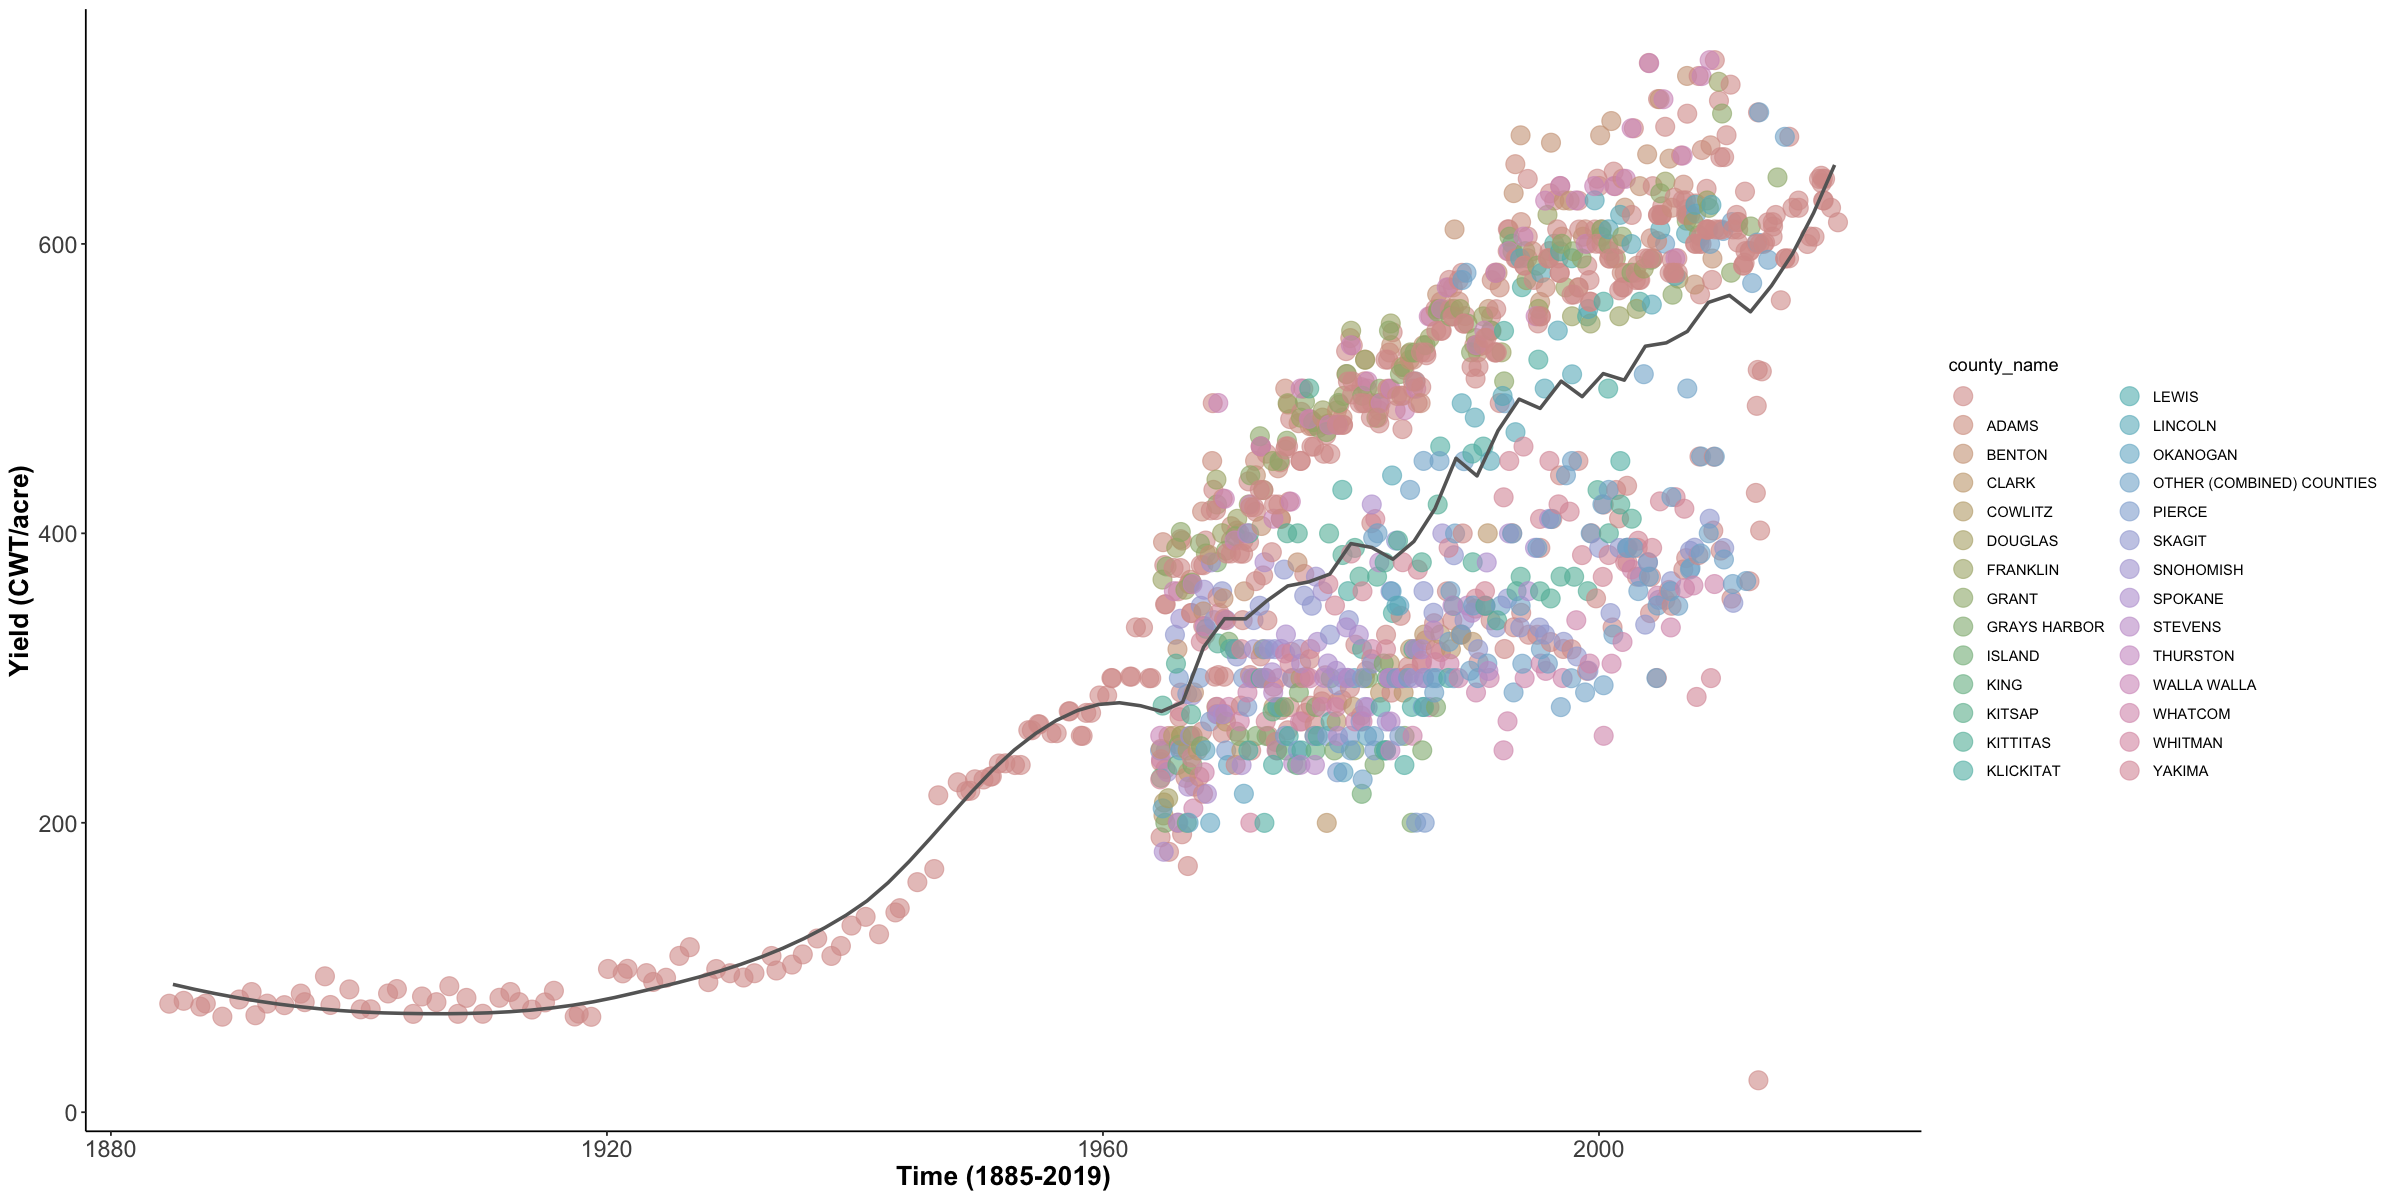

In [112]:
# Plot size
options(repr.plot.width = 20, repr.plot.height = 10)
# Plot
dty %>%
group_by(year) %>%
select(year, value, county_name) %>%
ggplot(aes(x=year, y=value)) +
geom_jitter(aes(colour = county_name), size=5, alpha=3/5) +
theme_classic() + 
theme(axis.title.x=element_text(size=16, face="bold"),
      axis.text.x=element_text(size=14),
      axis.title.y=element_text(size=16,face="bold"),
      axis.text.y=element_text(size=14)) +
scale_color_hue(l=70, c=40) +
labs(x="Time (1885-2019)",
    y="Yield (CWT/acre)")  +
geom_smooth(method = "loess", span = 0.1, se = FALSE, color="grey40")